### Table of Contents

* [1.Required librairies](#lib)
* [2.Files of the datasets](#files)
* [3.Third dataset: EdStatsData.csv](#d3)
    * [3.1.Remove the small countries](#pp)
* [4.Fifth dataset : EdStatsSeries.csv](#d5)
    * [4.1.Choice of the indicators](#ci)
    * [4.2.Order of magnitude of the indicators](#om)
    * [4.3.Order of magnitude by country group](#omcg)
* [5.Graphs](#gr)

## 1.Required librairies<a class="anchor" id="lib"></a>

In [2]:
#importing required packages
import pandas as pd
import numpy as np
import missingno as msno


## 2.Files of the datasets <a class="anchor" id="Files"></a>

In [4]:
from os import listdir
from os.path import isfile, join
mypath='Projet+Python_Dataset_Edstats_csv'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['EdStatsCountry-Series.csv', 'EdStatsCountry.csv', 'EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsSeries.csv']


## 3.Third dataset: EdStatsData.csv <a class="anchor" id="d3"></a>
 * **Hint:In this dataset the description of the country is given by Country Name**

In [5]:
#Dataset3
f3=mypath+'/'+onlyfiles[2]
print(onlyfiles[2])
df3=pd.read_csv(f3)
print('Rows number:',df3.shape[0], ',Columns number:',df3.shape[1])
df3.columns
print( onlyfiles[2], 'columns\'name are',df3.columns.values)

EdStatsData.csv
Rows number: 886930 ,Columns number: 70
EdStatsData.csv columns'name are ['Country Name' 'Country Code' 'Indicator Name' 'Indicator Code' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2020' '2025' '2030'
 '2035' '2040' '2045' '2050' '2055' '2060' '2065' '2070' '2075' '2080'
 '2085' '2090' '2095' '2100' 'Unnamed: 69']


In [28]:
df3.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

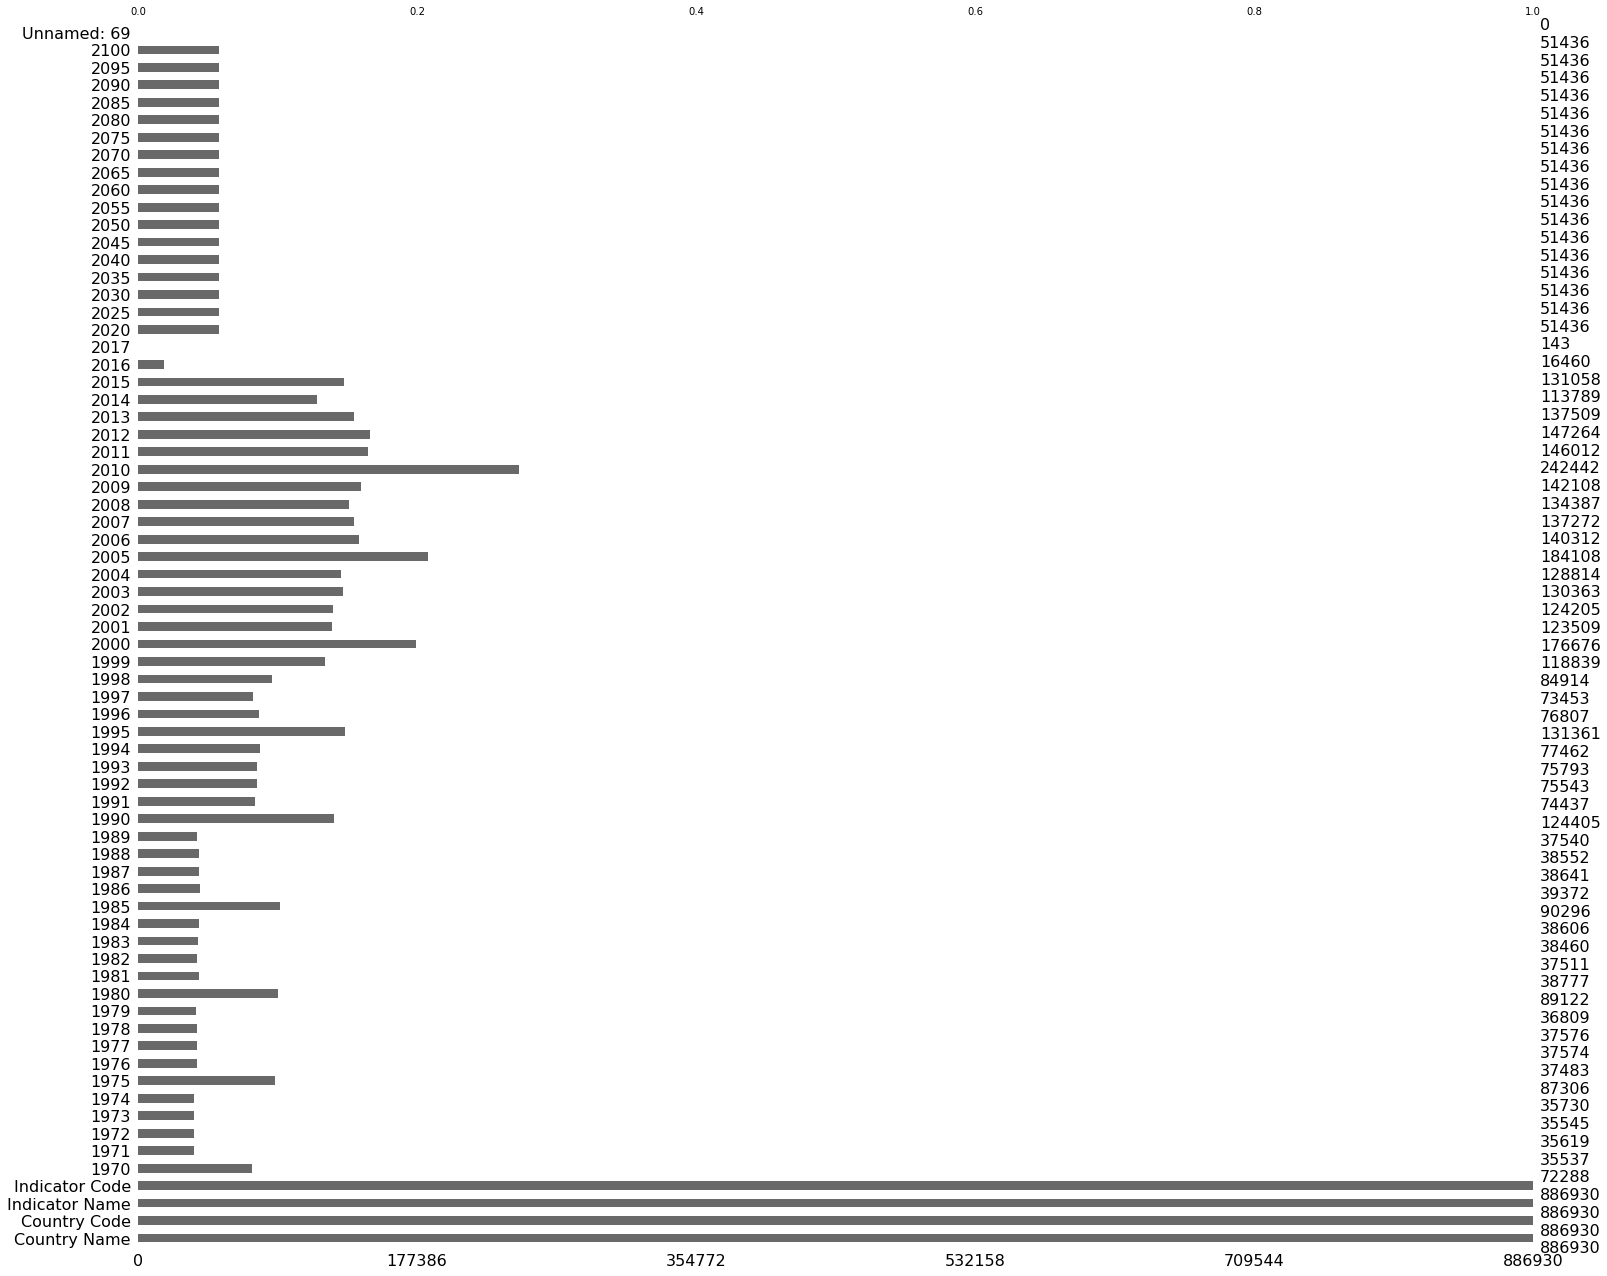

In [31]:
# Gives a bar chart of the missing values
msno.bar(df3)


### 3.1.Remove the small countries <a class="anchor" id="pp"></a>

In [90]:
#remove the small countries ==>keep data between 1990 and 2015
df31=df3[['Country Name','Country Code','Indicator Name','Indicator Code','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
#df31.head()
#df31['Country Name'].unique()

In [240]:
#remove rows with (all) nan in col columns
col=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
dftest = df31.dropna(subset = col)
nb_c_before=df31['Country Name'].unique().shape[0]
dftest.head()
nb_c_after=dftest['Country Name'].unique().shape[0]
print("Initial number of country:",nb_c_before,'\n')
print("Number of country after filtering:",nb_c_after,'\n')
retained_country=dftest['Country Name'].unique()

Initial number of country: 242 

Number of country after filtering: 240 



In [113]:
indic1=dftest['Indicator Name'].unique()
print(indic1.shape[0])

301


In [241]:
dftest.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2483,Arab World,ARB,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,5.349138e+01,5.371026e+01,5.388915e+01,5.423276e+01,5.463656e+01,5.517433e+01,...,6.090866e+01,6.137463e+01,6.179117e+01,6.213937e+01,6.240935e+01,6.250115e+01,6.252948e+01,6.251059e+01,6.247315e+01,6.243928e+01
4907,East Asia & Pacific,EAS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,7.617551e+12,7.952496e+12,8.224151e+12,8.518418e+12,8.881872e+12,9.336155e+12,...,1.416183e+13,1.508230e+13,1.561056e+13,1.582121e+13,1.693876e+13,1.771876e+13,1.854448e+13,1.942585e+13,2.022557e+13,2.105782e+13
4908,East Asia & Pacific,EAS,GDP at market prices (current US$),NY.GDP.MKTP.CD,4.746999e+12,5.345048e+12,5.835758e+12,6.552477e+12,7.313624e+12,8.310311e+12,...,1.093973e+13,1.223700e+13,1.413406e+13,1.456452e+13,1.693876e+13,1.963867e+13,2.101913e+13,2.126254e+13,2.190003e+13,2.176695e+13
4909,East Asia & Pacific,EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,4.187105e+03,4.310058e+03,4.399782e+03,4.501287e+03,4.636429e+03,4.815640e+03,...,6.601498e+03,6.981153e+03,7.174526e+03,7.221621e+03,7.679834e+03,7.980136e+03,8.295707e+03,8.631591e+03,8.926072e+03,9.231014e+03
4910,East Asia & Pacific,EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,2.609261e+03,2.896885e+03,3.122032e+03,3.462448e+03,3.817788e+03,4.286504e+03,...,5.099524e+03,5.664143e+03,6.495933e+03,6.648005e+03,7.679834e+03,8.844823e+03,9.402723e+03,9.447701e+03,9.665056e+03,9.541871e+03


## 4.Fifth dataset : EdStatsSeries.csv <a class="anchor" id="d5"></a>
* **Hint:In this dataset the description of the country is given by Series Code**

In [247]:
#Dataset5
f5=mypath+'/'+onlyfiles[4]
print(onlyfiles[4])
df5=pd.read_csv(f5)

print('Rows number:',df5.shape[0], ',Columns number:',df5.shape[1])
df5.columns
print( onlyfiles[4], 'columns\'name are',df5.columns.values)

EdStatsSeries.csv
Rows number: 3665 ,Columns number: 21
EdStatsSeries.csv columns'name are ['Series Code' 'Topic' 'Indicator Name' 'Short definition'
 'Long definition' 'Unit of measure' 'Periodicity' 'Base Period'
 'Other notes' 'Aggregation method' 'Limitations and exceptions'
 'Notes from original source' 'General comments' 'Source'
 'Statistical concept and methodology' 'Development relevance'
 'Related source links' 'Other web links' 'Related indicators'
 'License Type' 'Unnamed: 20']


In [38]:
df5.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
df5['Indicator Name'].unique().shape

(3665,)

<AxesSubplot:>

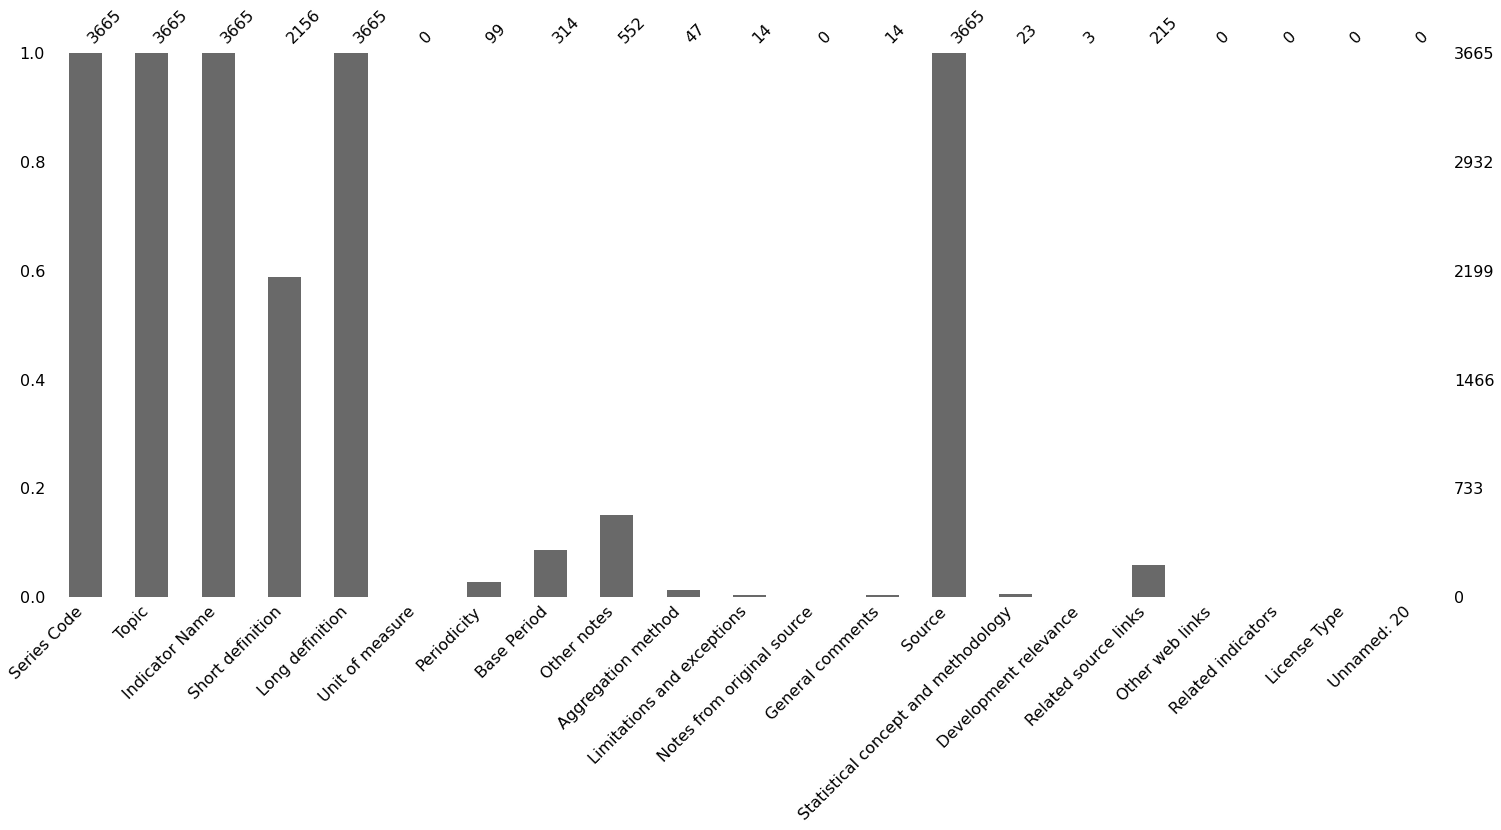

In [43]:
# Gives a bar chart of the missing values
msno.bar(df5)

### 4.1.Choice of the indicators <a class="anchor" id="ci"></a>

In [250]:
 # Drop columns with all NaN values 
df51 = df5.dropna(how='all', axis=1)
#df51.head()

<AxesSubplot:>

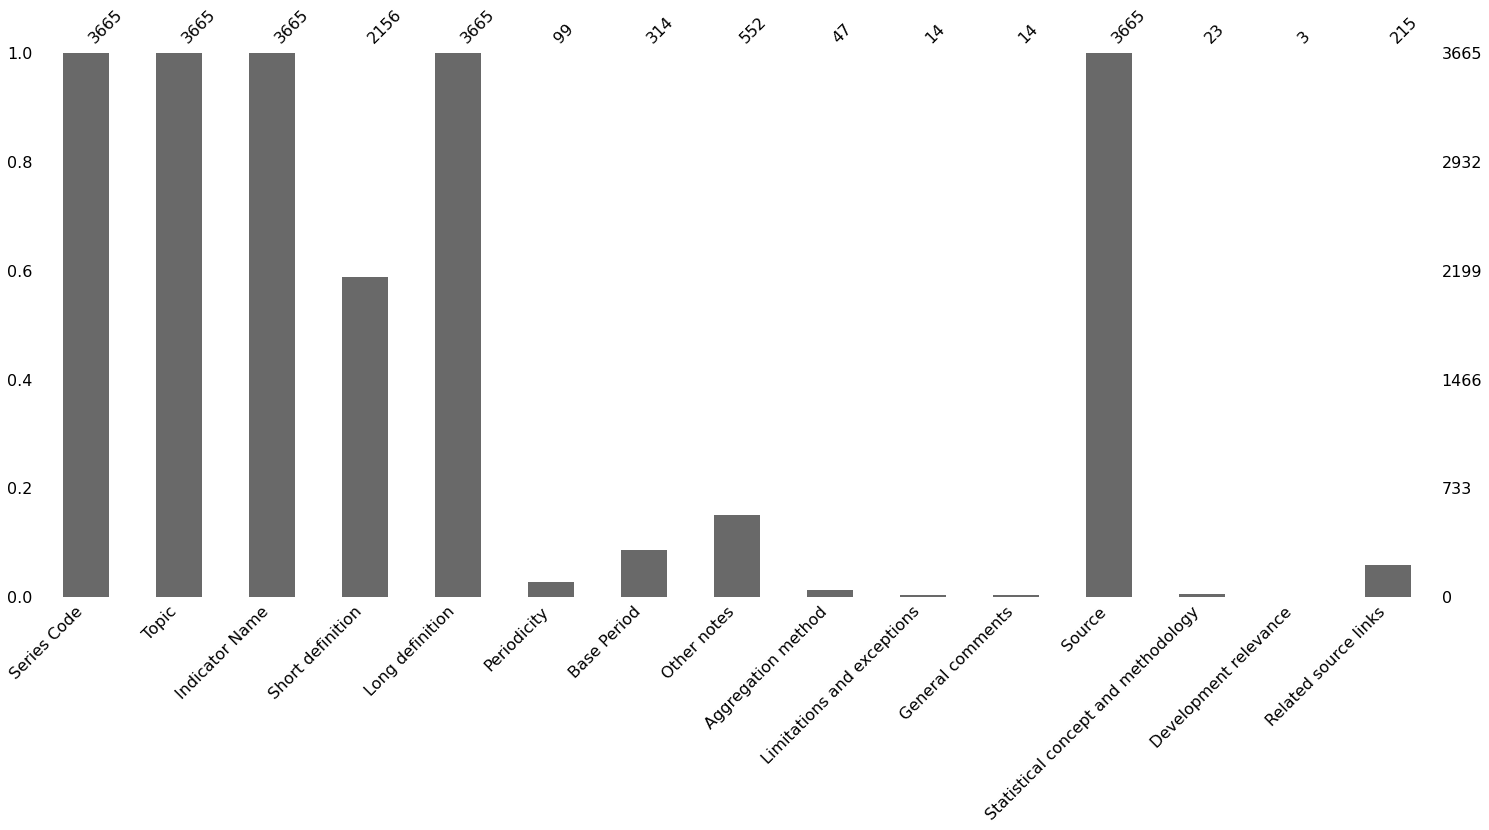

In [18]:
# Gives a bar chart of the missing values
msno.bar(df51)

In [251]:
#keep some columns 
df52 = df51[['Series Code','Indicator Name','Periodicity','Base Period']] 
df52.head(3)
                                     
                            
                       
                          
                           
                           
                        
                    
                       
                                    
                  


,Series Code,Indicator Name,Periodicity,Base Period
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...,NaN,NaN
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age...,NaN,NaN


In [253]:
indic2=df52['Indicator Name'].unique()



In [254]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
    
indic3=intersection(indic1, indic2)
print(len(indic3))

281


In [182]:
retained_indic=['Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Theoretical duration of lower secondary education (years)',
 'Theoretical duration of pre-primary education (years)',
 'Theoretical duration of primary education (years)',
 'Theoretical duration of secondary education (years)',
 'Theoretical duration of upper secondary education (years)'
 'Percentage of enrolment in pre-primary education in private institutions (%)',
 'Percentage of female students in secondary education enrolled in vocational programmes, female (%)',
 'Percentage of male students in secondary education enrolled in vocational programmes, male (%)']
#df6 = dftest[dftest['Indicator Name'].str.extract('|'.join(retained_indic[0]))]
#df6 = dftest[dftest['Indicator Name'].str.match('|'.join(retained_indic), na=False)]

### 4.3.Order of magnitude by country group<a class="anchor" id="omcg"></a>

In [259]:
dftest.loc[29324,:]

Country Name                                            High income
Country Code                                                    HIC
Indicator Name    Adjusted net enrolment rate, primary, both sex...
Indicator Code                                          SE.PRM.TENR
1990                                                       95.81282
1991                                                      95.725754
1992                                                       95.19297
1993                                                      94.950569
1994                                                       94.89193
1995                                                      95.349281
1996                                                      95.454369
1997                                                       96.06179
1998                                                      96.783943
1999                                                      97.016472
2000                                            

In [258]:
#Order of magnitude(average, std, median)  relatd to all the retained indic 
dataframe=dftest.loc[dftest['Indicator Name'].isin(retained_indic)]
dataframe.head(1)
#dataframe['average']=dataframe[col].mean(axis=1)
##dataframe['std']=dataframe[col].std(axis=1)
#dataframe['median']=dataframe[col].median(axis=1)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
29324,High income,HIC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.81282,95.725754,95.19297,94.950569,94.89193,95.349281,...,96.789879,97.177429,97.457123,97.03537,96.959221,96.640938,96.868973,96.800774,96.817528,97.163872


In [256]:
dataframe.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,average,std,median
29324,High income,HIC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.812820,95.725754,95.192970,94.950569,94.891930,95.349281,...,97.035370,96.959221,96.640938,96.868973,96.800774,96.817528,97.163872,96.410383,0.751464,96.712440
29325,High income,HIC,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,95.803970,95.622124,95.062813,94.739700,94.717773,95.140892,...,97.391289,97.130623,96.962669,96.966263,96.794563,96.934563,97.357094,96.477282,0.881111,96.799236
29327,High income,HIC,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,95.821243,95.824448,95.316948,95.151382,95.057693,95.547462,...,96.696869,96.796120,96.334648,96.776283,96.806686,96.705910,96.979553,96.346816,0.642354,96.481041


In [238]:
dataframe.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,average,std,median
29324,High income,HIC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.812820,95.725754,95.192970,94.950569,94.891930,95.349281,...,97.035370,96.959221,96.640938,96.868973,96.800774,96.817528,97.163872,96.410383,0.751464,96.712440
29325,High income,HIC,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,95.803970,95.622124,95.062813,94.739700,94.717773,95.140892,...,97.391289,97.130623,96.962669,96.966263,96.794563,96.934563,97.357094,96.477282,0.881111,96.799236
29327,High income,HIC,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,95.821243,95.824448,95.316948,95.151382,95.057693,95.547462,...,96.696869,96.796120,96.334648,96.776283,96.806686,96.705910,96.979553,96.346816,0.642354,96.481041
31195,High income,HIC,Percentage of female students in secondary edu...,SE.SEC.ENRL.FE.VO.ZS,17.567070,17.662060,17.768909,18.186220,18.564699,18.526720,...,12.363640,12.570390,12.324070,12.155040,14.116710,13.824090,13.764350,14.987026,2.284200,14.212930
31258,High income,HIC,Percentage of male students in secondary educa...,SE.SEC.ENRL.MA.VO.ZS,19.855949,19.996620,19.956530,20.464899,21.160391,21.207781,...,16.149940,16.295891,16.004919,15.828990,17.234261,17.018530,16.979130,17.935480,1.901863,17.126395


## 5.Graphs <a class="anchor" id="g"></a>